# BIG DATA SALES

In [72]:
#First importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [30]:
#Now,b reading the train & test data

train_data=pd.read_csv("bigdatamart_Train.csv")
test_data=pd.read_csv("bigdatamart_Test.csv")

In [31]:
df1=train_data
df2=test_data

In [32]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
df1.shape

(8523, 12)

In [34]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [35]:
print(df2.shape)
print(df2.describe())

(5681, 11)
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000


In [36]:
df2.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [37]:
# Now , I am checking the uniqueness of the Item_Fat_Content

df2['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [40]:
# combining Item_Fat_Content misspelled

df1['Item_Fat_Content'].replace(['reg','low fat','LF'],['Regular','Low Fat','Low Fat'],inplace = True)
df2['Item_Fat_Content'].replace(['reg','low fat','LF'],['Regular','Low Fat','Low Fat'],inplace = True)

In [41]:
# Now creating new column for years

df1['Num_Of_Years'] = train_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 
df2['Num_Of_Years'] = test_data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [42]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


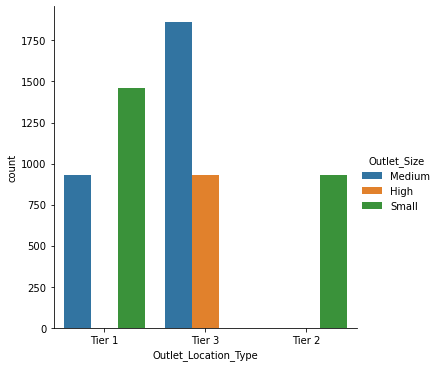

In [53]:
sns.factorplot('Outlet_Location_Type',data=df1,hue ='Outlet_Size',kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


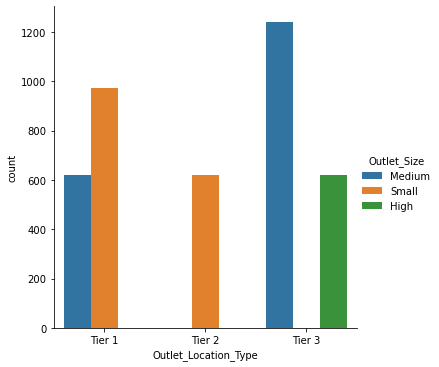

In [55]:
sns.factorplot('Outlet_Location_Type',data=df2,hue ='Outlet_Size' ,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


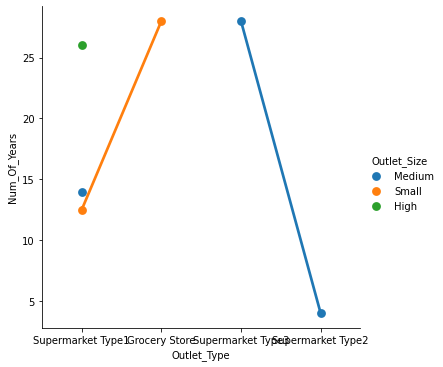

In [56]:
sns.factorplot('Outlet_Type','Num_Of_Years',data = df2,hue='Outlet_Size' )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


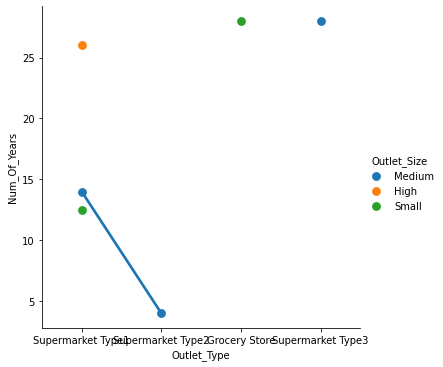

In [63]:
sns.factorplot('Outlet_Type','Num_Of_Years',data = df1,hue='Outlet_Size')

In [60]:
full_data=[df1,df2]

In [64]:
#Now, I am filling the null values

for data in full_data:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
    data['Outlet_Size'].fillna('Medium',inplace = True)

In [65]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [66]:
df3 = pd.get_dummies(df1, columns = col, drop_first = True)
df4 = pd.get_dummies(df2, columns = col,drop_first = True)

In [67]:
cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Num_Of_Years',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [69]:
x = df3[cols]
y = df3['Item_Outlet_Sales']

In [74]:
# splitting data as x_train and X_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

In [94]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
print(y_test)

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
4644    3235.7880
6179     555.2772
1861    2885.5772
3598     218.3824
1523    5478.2024
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [95]:
#Now obtaining ot Root Mean Square Error

from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [96]:
print(rmse)

1132.154574390424


In [98]:
#Now predicting actual test data

x_t = df4[cols]
y_re = lg.predict(x_t)

In [99]:
print(y_re)

[1815.02913421 1550.03990924 1919.56810626 ... 1837.32333838 3667.47797899
 1321.20829395]


In [101]:
#creating results .csv file
re = pd.DataFrame()
re['Item_Identifier'] = df4['Item_Identifier']
re['Outlet_Identifier'] = df4['Outlet_Identifier']

re["Item_Outlet_Sales"] = y_re
re = re.sort_index()
re.to_csv('Big Mart Data.csv',index = False)